In [10]:
pip install numpy tensorflow matplotlib pandas tensorflow-hub seaborn scikit-learn imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Assuming "wine-reviews.csv" is your dataset file
df = pd.read_csv("diabetes.csv")
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

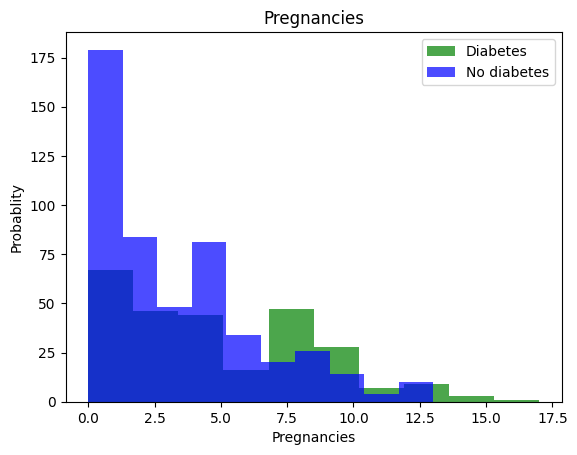

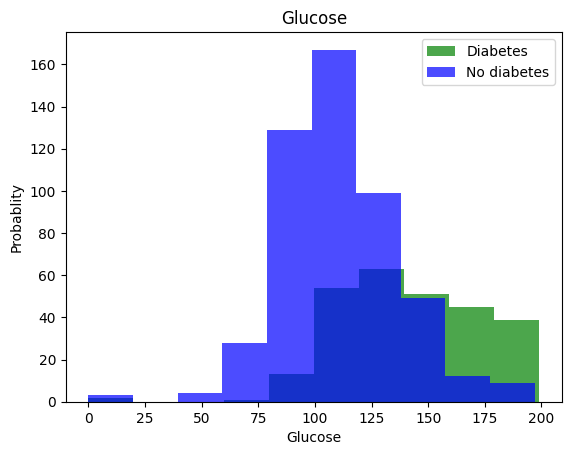

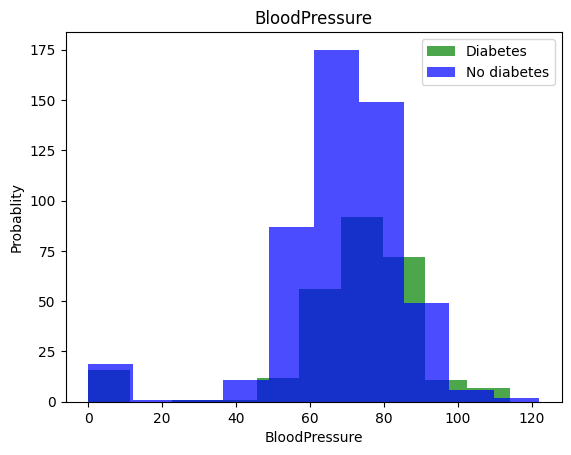

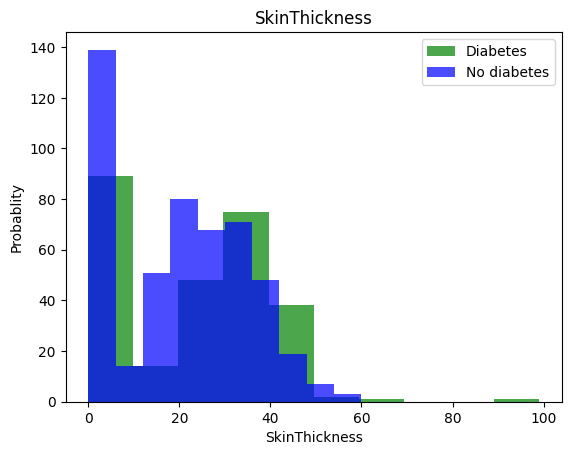

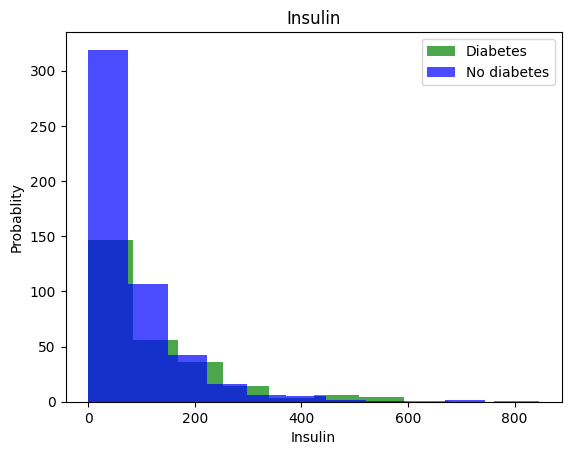

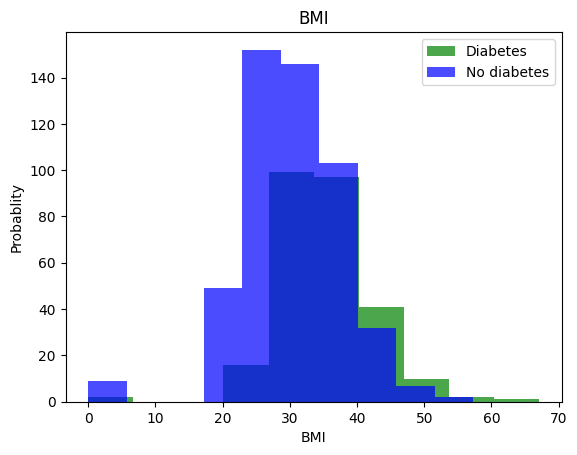

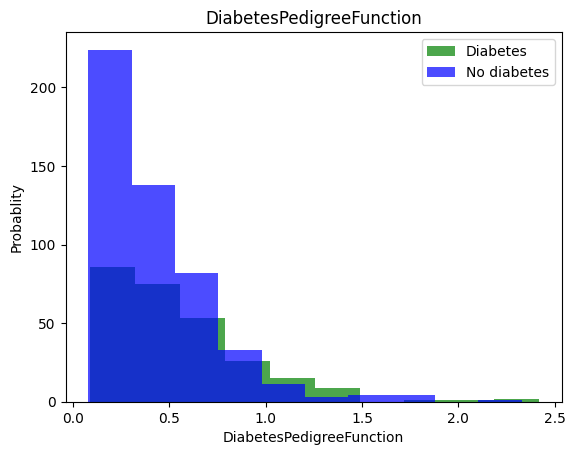

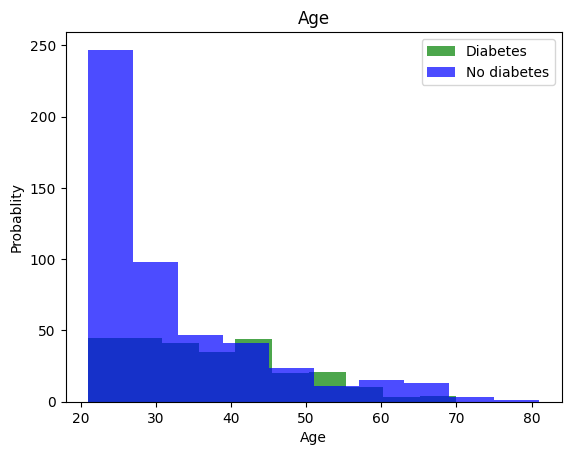

In [23]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]

    plt.hist(df[df['Outcome'] == 1][label], color='green', label="Diabetes", alpha=0.7)
    plt.hist(df[df['Outcome'] == 0][label], color='blue', label="No diabetes", alpha=0.7)

    plt.title(label)
    plt.ylabel("Probablity")
    plt.xlabel(label)

    plt.legend()
    plt.show()


In [24]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [26]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, Y)

data_resampled = np.hstack((X_resampled, np.reshape(y_resampled, (-1, 1))))
transformed_df = pd.DataFrame(data_resampled, columns=df.columns)

len_positive_class = len(transformed_df[transformed_df["Outcome"] == 1])
len_negative_class = len(transformed_df[transformed_df["Outcome"] == 0])

print("Number of samples in the positive class:", len_positive_class)
print("Number of samples in the negative class:", len_negative_class)

Number of samples in the positive class: 500
Number of samples in the negative class: 500


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.evaluate(X_train, y_train)
model.evaluate(X_valid, y_valid)

model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

5/5 [==============================] - 0s 2ms/step - loss: 22.9037 - accuracy: 0.3506
Epoch 1/20
29/29 [==============================] - 1s 4ms/step - loss: 13.1585 - accuracy: 0.4217 - val_loss: 2.6044 - val_accuracy: 0.6558
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 2.7638 - accuracy: 0.6435 - val_loss: 2.1122 - val_accuracy: 0.6494
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 2.0119 - accuracy: 0.6304 - val_loss: 1.7794 - val_accuracy: 0.5909
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 1.5151 - accuracy: 0.6304 - val_loss: 1.5896 - val_accuracy: 0.5779
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 1.3012 - accuracy: 0.6239 - val_loss: 1.3714 - val_accuracy: 0.6299
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 1.1214 - accuracy: 0.6304 - val_loss: 1.2359 - val_accuracy: 0.5844
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 1